## **Manual Thresholding**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

In [ ]:
def manual_threshold(im_in, threshold):# Funtion to perfrom manual threshold on the input image
    manual_thresh_img = np.array(im_in)
    manual_thresh_img[im_in > threshold] = 255
    manual_thresh_img[im_in <= threshold] = 0
    return manual_thresh_img

In [ ]:
def plot_image(img_data, im_size):#Function to plot the input image
    equalized_image = img_data.reshape((im_size, im_size)).astype(np.uint8)
    plt.figure(figsize=(6, 6))
    plt.imshow(equalized_image, cmap='gray', vmin=0, vmax=255)
    plt.title('Image after manual thresholding')
    plt.axis('off')
    plt.show()

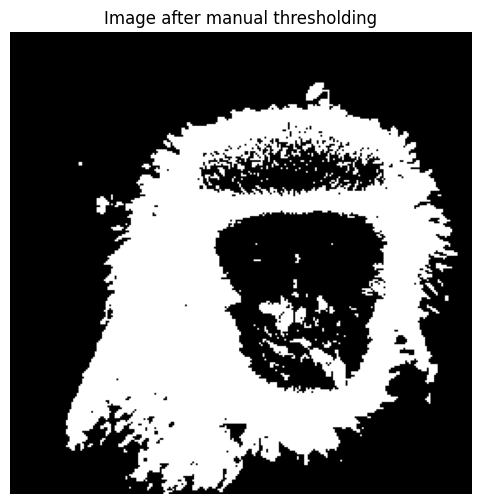

In [ ]:
img_path = 'b2_a.png' #Code to take an input image and apply functions to it to perfrom manual thresholding
img = Image.open(img_path).convert('L')

img_data = np.array(img).flatten()
im_size = img.size[0]

threshold_img_manual = manual_threshold(img_data, 128)#Threshold value(128)

plot_image(threshold_img_manual, im_size)

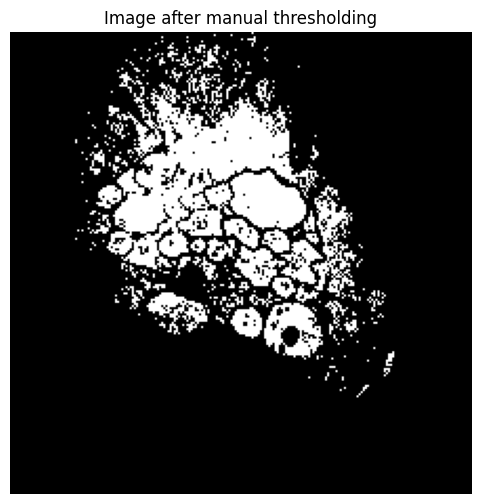

In [ ]:
img_path = 'b2_b.png'#Code to take an input image and apply functions to it to perfrom manual thresholding
img = Image.open(img_path).convert('L')

img_data = np.array(img).flatten()
im_size = img.size[0]

threshold_img_manual = manual_threshold(img_data, 128)#Threshold value(128)

plot_image(threshold_img_manual, im_size)

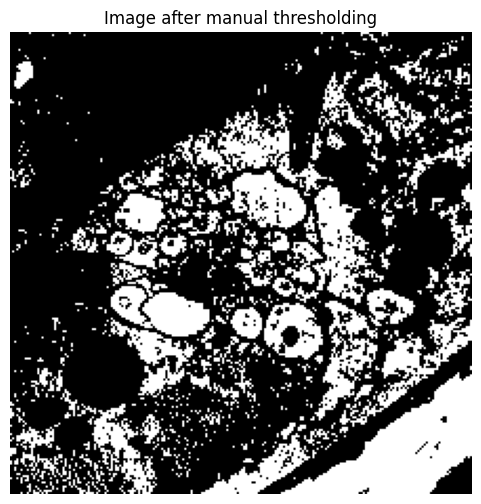

In [ ]:
img_path = 'b2_c.png'#Code to take an input image and apply functions to it to perfrom manual thresholding
img = Image.open(img_path).convert('L')

img_data = np.array(img).flatten()
im_size = img.size[0]

threshold_img_manual = manual_threshold(img_data, 220)#Threshold value(220)

plot_image(threshold_img_manual, im_size)

## **Otsu Thresholding**

In [ ]:
def create_pdf(im_in):#Function to create the pdf using the image input
    no_of_pixels = [0] * 256
    total_pixels = len(im_in)

    for pixel_value in im_in:
        no_of_pixels[pixel_value] += 1

    pdf = [count / total_pixels for count in no_of_pixels]
    return pdf

In [ ]:
def plot_pdf(pdf):#:#Function to plot the pdf for the input image
    plt.plot(range(256), pdf, color='b')
    plt.title('Probability Density Function (PDF) of the image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Probability Density Value')
    plt.xlim(0, 255)
    plt.show()

In [ ]:
def otsu_threshold(im_in):#Function to perfrom Otsu threshold(automatically finidng optimal threshold for an image)
    pdf = create_pdf(im_in)
    max_variance = float('-inf')
    otsu_threshold_value = 0
    inter_class_variances = []

    for threshold_value in range(256):
        background_probability = sum(pdf[:threshold_value])
        foreground_probability = sum(pdf[threshold_value:])

        if background_probability == 0 or foreground_probability == 0:
            inter_class_variances.append(0)
            continue

        background_sum = sum(i * p for i, p in enumerate(pdf[:threshold_value]))
        background_mean = background_sum / background_probability
        foreground_mean = (sum(i * p for i, p in enumerate(pdf)) - background_sum) / foreground_probability

        inter_class_variance = background_probability * foreground_probability * ((background_mean - foreground_mean) ** 2)
        inter_class_variances.append(inter_class_variance)

        if inter_class_variance > max_variance:
            max_variance = inter_class_variance
            otsu_threshold_value = threshold_value

    otsu_threshold_image = [255 if pixel > otsu_threshold_value else 0 for pixel in im_in]
    return otsu_threshold_image, otsu_threshold_value, max_variance, inter_class_variances

In [ ]:
def plot_image_with_threshold(im_in, threshold_value, im_size):#Fucntion to plot the thresholded image with the threshold value
    reshaped_image = np.array(im_in).reshape((im_size, im_size)).astype(np.uint8)

    plt.imshow(reshaped_image, cmap='gray')
    plt.title(f'Image after Otsu Thresholding (Threshold: {threshold_value})')
    plt.axis('off')
    plt.show()



In [ ]:
def plot_inter_class_variance(inter_class_variances):#Fucntion to plot the inter classs variance vs threshold plot to identify the peak in the plot
    plt.plot(range(256), inter_class_variances)
    plt.title('Inter-Class Variance vs. Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Inter-Class Variance')
    plt.show()

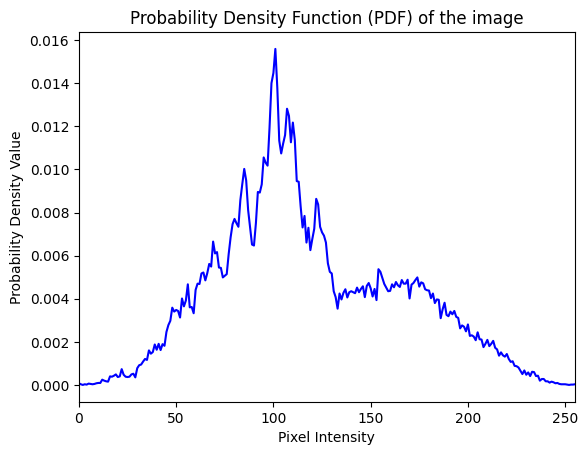

Otsu Threshold Value: 132
Maximum Inter-class Variance: 1448.0136082304261


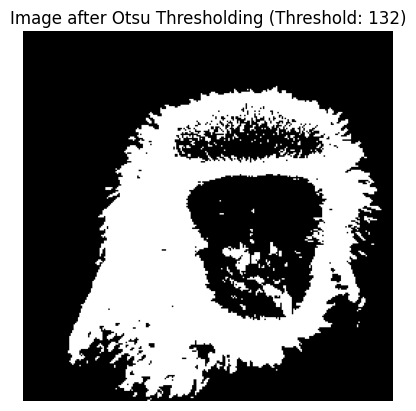

In [ ]:
img_path = '/content/b2_a.png'  #Python Code to take the input image and apply fucntions such that it results in thresholded image, and required plots
img = Image.open(img_path).convert('L')

img_data = list(img.getdata())
im_size = int(math.sqrt(len(img_data)))


pdf = create_pdf(img_data)
plot_pdf(pdf)


otsu_threshold_image, otsu_threshold_value,max_variance, inter_class_variances = otsu_threshold(img_data)
print(f'Otsu Threshold Value: {otsu_threshold_value}')
print(f'Maximum Inter-class Variance: {max_variance}')


plot_image_with_threshold(otsu_threshold_image, otsu_threshold_value, im_size)



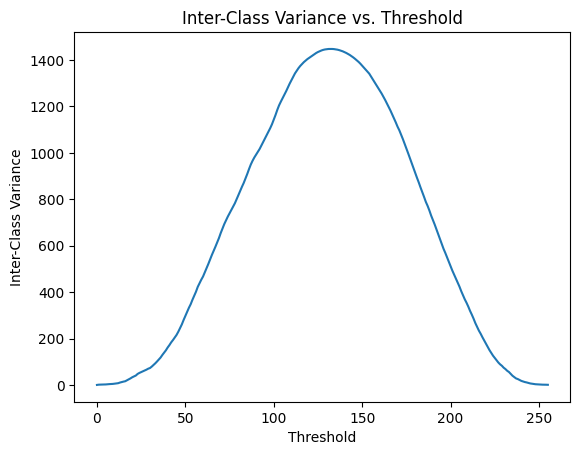

In [ ]:
# Inter-class variance vs. Threshold
plot_inter_class_variance(inter_class_variances)

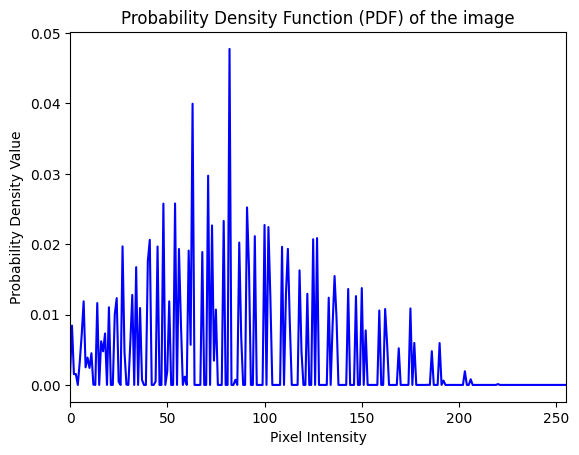

Otsu Threshold Value: 86
Maximum Inter-class Variance: 1366.6478182943322


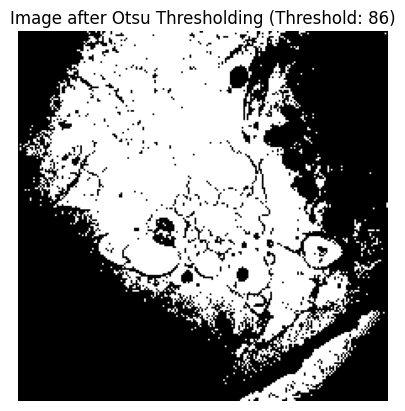

In [ ]:
img_path = '/content/b2_b.png'  #Python Code to take the input image and apply fucntions such that it results in thresholded image, and required plots
img = Image.open(img_path).convert('L')


img_data = list(img.getdata())
im_size = int(math.sqrt(len(img_data)))

pdf = create_pdf(img_data)
plot_pdf(pdf)

otsu_threshold_image, otsu_threshold_value,max_variance, inter_class_variances = otsu_threshold(img_data)
print(f'Otsu Threshold Value: {otsu_threshold_value}')
print(f'Maximum Inter-class Variance: {max_variance}')

plot_image_with_threshold(otsu_threshold_image, otsu_threshold_value, im_size)



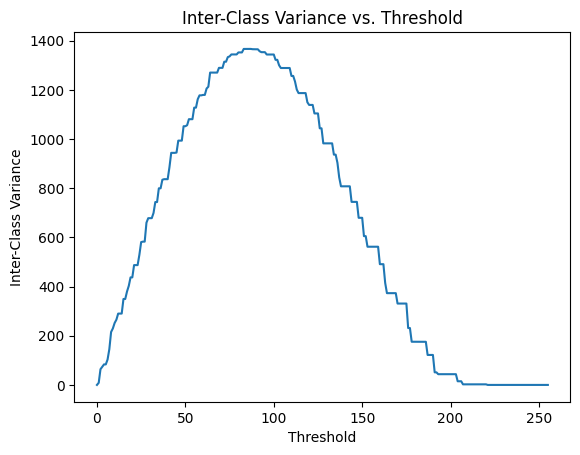

In [ ]:
#  Inter-class variance vs. Threshold Plot
plot_inter_class_variance(inter_class_variances)

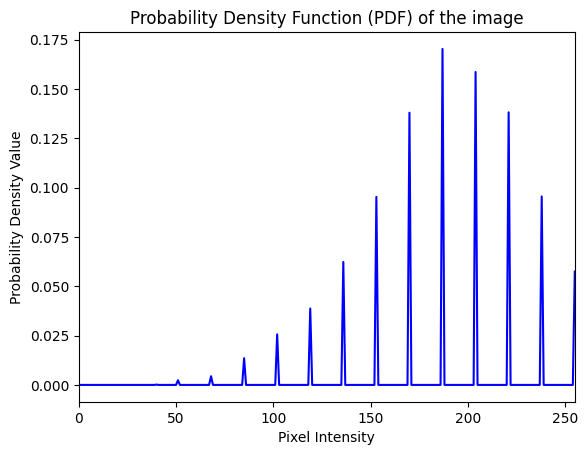

Otsu Threshold Value: 171
Maximum Inter-class Variance: 1079.7087141560728


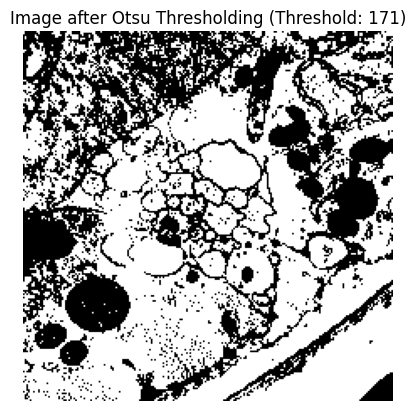

In [ ]:
img_path = '/content/b2_c.png' #Python Code to take the input image and apply fucntions such that it results in thresholded image, and required plots
img = Image.open(img_path).convert('L')

img_data = list(img.getdata())
im_size = int(math.sqrt(len(img_data)))

pdf = create_pdf(img_data)
plot_pdf(pdf)

otsu_threshold_image, otsu_threshold_value,max_variance, inter_class_variances = otsu_threshold(img_data)
print(f'Otsu Threshold Value: {otsu_threshold_value}')
print(f'Maximum Inter-class Variance: {max_variance}')

plot_image_with_threshold(otsu_threshold_image, otsu_threshold_value, im_size)

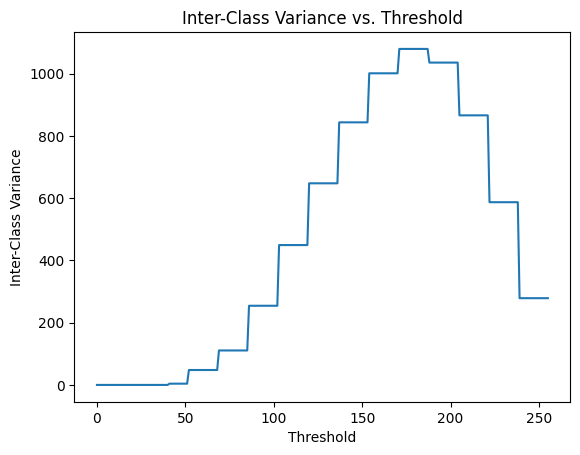

In [ ]:
# Inter-class variance vs. Threshold Plot
plot_inter_class_variance(inter_class_variances)